# Exercise 5.8:
Write a program that uses the adaptive Simpson's rule method of Section 5.3 and Eqs (5.35) to (5.39) to calculate the same integral as in Exercise 5.7 , again to an approximate accuracy of $\epsilon = 10^{-6}$. Starting this time with two integration slices, work up from there to four eight, and so forth, printing out the results at each step until the required accuracy is reached. You should find you reach that accuracy for a signicantly smaller number of slices than with the trapezoidal rule calculation in part(a) of Exercise 5.7, but a somewhat larger number than with the Romberg integration of part (b).


$$ S_i = \frac{1}{3}\bigg[f(a) + f(b) + 2\sum_{k \text{ } even}f(a+kh_i)\bigg],\\
T_i = \frac{2}{3} \sum_{k \: odd}f(a+kh_i).\\
S_i = S_{i-1} + T_{i-1}\\
I_i = h_i(S_i + 2T_i)\\
\epsilon_i = \frac{1}{15}(I_i - I_{i-1})$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

$$ I = \int^1_0\sin^2\sqrt{100x}dx$$

In [2]:
def f(x):
    return np.sin(np.sqrt(100*x))**2

In [3]:
def simpson_adaptive(f, start, end, N, I_prev=0):
    '''
    Approximates the integral with the adaptive simpson's rule
    parameters:
    
    inputs:
    f - function to integrate
    start - float starting point
    end - float end point
    N - int number of slices
    I_prev - float the previous integrand result
    
    outputs:
    I - float the integrand
    error - float the estimated error
    '''
    # first set up the variables we need
    h = (end-start)/N
    x = np.linspace(start, end, N+1)
    y = f(x)
    fa, fb = y[0], y[-1]
    
    # set up the weight rows with which we'll multiply our f(x)
    weights = np.ones(N+1)
    weights[0], weights[-1] = 0, 0
    weights_S, weights_T = weights.copy(), weights.copy()
    weights_S[1::2] = 0 # S only sums over the even terms
    weights_T[::2] = 0  # T only sums over the odd terms
    
    # calculate S, T, I and the error
    S = (1/3)*(fa + fb + 2*sum(weights_S*y))
    T = (2/3)*sum(weights_T*y)
    I = h*(S+2*T)
    error = (1/15)*(I-I_prev)
    
    return I, error

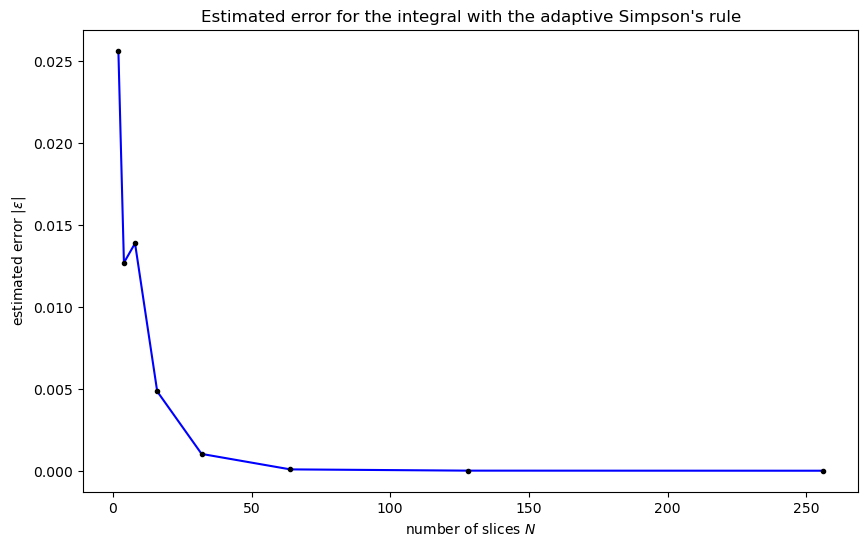

The estimated error goes below our threshold of 1e-06 with N = 256 slices.


In [5]:
N = 2
start, end = 0, 1
error = 1
epsilon = 1e-6

I_prev, error = simpson_adaptive(f, start, end, N)
Is, errors, Ns = [I_prev], [error], [N]


while abs(error) > epsilon:
    
    N *= 2
    I_prev, error = simpson_adaptive(f, start, end, N, I_prev)
    Is.append(I_prev)
    errors.append(error)
    Ns.append(N)

plt.figure(figsize=(10,6))
plt.title("Estimated error for the integral with the adaptive Simpson's rule")
plt.ylabel("estimated error $|\epsilon|$")
plt.xlabel("number of slices $N$")
plt.plot(Ns, [abs(i) for i in errors], 'b')
plt.plot(Ns, [abs(i) for i in errors], 'k.')
plt.show()

print(f"The estimated error goes below our threshold of {epsilon} with N = {N} slices.")
